
# "Polish companies bankruptcy" dataset processing

- Dataset source: https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data


## Dataset Analysys 

In [2]:
from pandas import DataFrame
from ucimlrepo import fetch_ucirepo
from typing import NamedTuple, List, Dict, Any
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


# Type definitions from:
# https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file#parameters
class UciMlData(NamedTuple):
    ids: DataFrame
    features: DataFrame
    targets: DataFrame
    original: DataFrame
    headers: List[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: Dict[str, Any]
    variables: DataFrame

In [3]:
# Dataset: Polish companies bankruptcy
# Source: https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data

polish_companies_bankruptcy: UciMlDataset = fetch_ucirepo(id=365)

X_all = polish_companies_bankruptcy.data.features
y_all = polish_companies_bankruptcy.data.targets

In [4]:
display(X_all.head())
display(y_all.head())
display(pd.DataFrame(X_all.dtypes).T)

print("Number of features: ", X_all.shape[1])
print("Number of samples: ", X_all.shape[0])
print("Feature types: ", X_all.dtypes.unique())

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


,class
0,0
1,0
2,0
3,0
4,0


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Number of features:  65
Number of samples:  43405
Feature types:  [dtype('int64') dtype('float64')]


In [5]:
# additional feature information
feature_description = pd.DataFrame(
    [
        ["A1", "net profit / total assets"],
        ["A2", "total liabilities / total assets"],
        ["A3", "working capital / total assets"],
        ["A4", "current assets / short-term liabilities"],
        [
            "A5",
            "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
        ],
        ["A6", "retained earnings / total assets"],
        ["A7", "EBIT / total assets"],
        ["A8", "book value of equity / total liabilities"],
        ["A9", "sales / total assets"],
        ["A10", "equity / total assets"],
        [
            "A11",
            "(gross profit + extraordinary items + financial expenses) / total assets",
        ],
        ["A12", "gross profit / short-term liabilities"],
        ["A13", "(gross profit + depreciation) / sales"],
        ["A14", "(gross profit + interest) / total assets"],
        ["A15", "(total liabilities * 365) / (gross profit + depreciation)"],
        ["A16", "(gross profit + depreciation) / total liabilities"],
        ["A17", "total assets / total liabilities"],
        ["A18", "gross profit / total assets"],
        ["A19", "gross profit / sales"],
        ["A20", "(inventory * 365) / sales"],
        ["A21", "sales (n) / sales (n-1)"],
        ["A22", "profit on operating activities / total assets"],
        ["A23", "net profit / sales"],
        ["A24", "gross profit (in 3 years) / total assets"],
        ["A25", "(equity - share capital) / total assets"],
        ["A26", "(net profit + depreciation) / total liabilities"],
        ["A27", "profit on operating activities / financial expenses"],
        ["A28", "working capital / fixed assets"],
        ["A29", "logarithm of total assets"],
        ["A30", "(total liabilities - cash) / sales"],
        ["A31", "(gross profit + interest) / sales"],
        ["A32", "(current liabilities * 365) / cost of products sold"],
        ["A33", "operating expenses / short-term liabilities"],
        ["A34", "operating expenses / total liabilities"],
        ["A35", "profit on sales / total assets"],
        ["A36", "total sales / total assets"],
        ["A37", "(current assets - inventories) / long-term liabilities"],
        ["A38", "constant capital / total assets"],
        ["A39", "profit on sales / sales"],
        ["A40", "(current assets - inventory - receivables) / short-term liabilities"],
        [
            "A41",
            "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
        ],
        ["A42", "profit on operating activities / sales"],
        ["A43", "rotation receivables + inventory turnover in days"],
        ["A44", "(receivables * 365) / sales"],
        ["A45", "net profit / inventory"],
        ["A46", "(current assets - inventory) / short-term liabilities"],
        ["A47", "(inventory * 365) / cost of products sold"],
        [
            "A48",
            "EBITDA (profit on operating activities - depreciation) / total assets",
        ],
        ["A49", "EBITDA (profit on operating activities - depreciation) / sales"],
        ["A50", "current assets / total liabilities"],
        ["A51", "short-term liabilities / total assets"],
        ["A52", "(short-term liabilities * 365) / cost of products sold)"],
        ["A53", "equity / fixed assets"],
        ["A54", "constant capital / fixed assets"],
        ["A55", "working capital"],
        ["A56", "(sales - cost of products sold) / sales"],
        [
            "A57",
            "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
        ],
        ["A58", "total costs /total sales"],
        ["A59", "long-term liabilities / equity"],
        ["A60", "sales / inventory"],
        ["A61", "sales / receivables"],
        ["A62", "(short-term liabilities *365) / sales"],
        ["A63", "sales / short-term liabilities"],
        ["A64", "sales / fixed assets"],
    ],
    columns=["Feature", "Description"],
)

display(feature_description)

,Feature,Description
0,A1,net profit / total assets
1,A2,total liabilities / total assets
2,A3,working capital / total assets
3,A4,current assets / short-term liabilities
4,A5,[(cash + short-term securities + receivables -...
...,...,...
59,A60,sales / inventory
60,A61,sales / receivables
61,A62,(short-term liabilities *365) / sales
62,A63,sales / short-term liabilities


## Visualizing the data

In [6]:
# Choose only samples from year = 1
# and remove the year column

year = 1
filter_idx = X_all["year"] == year

X = X_all[filter_idx].drop(columns=["year"])
y = y_all[filter_idx]

display(X.head())
display(y.head())

print("Number of features: ", X.shape[1])
print("Number of samples: ", X.shape[0])
print("Feature types: ", X.dtypes.unique())
print("Target types: ", y.dtypes.unique())

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


,class
0,0
1,0
2,0
3,0
4,0


Number of features:  64
Number of samples:  7027
Feature types:  [dtype('float64')]
Target types:  [dtype('int64')]


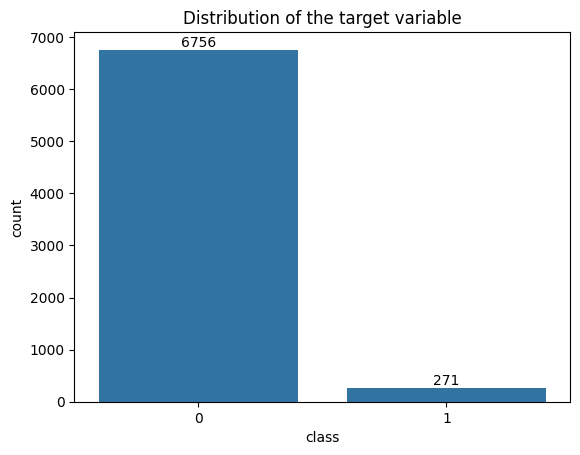

1 - Bankrupt, 0 - Not bankrupt


In [7]:
# Distribution of the target variable
ax = sns.countplot(x=y.columns[0], data=y)
plt.title("Distribution of the target variable")
abs_values = y["class"].value_counts().values
ax.bar_label(ax.containers[0], labels=abs_values, label_type="edge")
plt.show()
print("1 - Bankrupt, 0 - Not bankrupt")

In [14]:
# Summary statistics of the features
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
ranges = max_values - min_values
variances = np.var(X, axis=0)
mean_values = np.mean(X, axis=0)

df = pd.DataFrame(
    {
        "Min Value": min_values,
        "Max Value": max_values,
        "Range": ranges,
        "Variance": variances,
        "Mean": mean_values,
    }
)

display(df)
print(df)

,Min Value,Max Value,Range,Variance,Mean
A1,-2.568900e+02,94.28,3.511700e+02,2.084086e+01,0.034660
A2,-7.216200e+01,441.50,5.136620e+02,2.861932e+01,0.560215
A3,-4.405000e+02,1.00,4.415000e+02,2.782650e+01,0.119969
A4,0.000000e+00,1017.80,1.017800e+03,1.757324e+02,2.629143
A5,-2.722100e+06,990900.00,3.713000e+06,1.374330e+09,-263.167247
...,...,...,...,...,...
A60,4.700000e-05,2137800.00,2.137800e+06,6.825743e+08,432.882958
A61,1.600000e-05,21110.00,2.111000e+04,6.840101e+04,15.642228
A62,0.000000e+00,25016000.00,2.501600e+07,9.657263e+10,4763.201955
A63,1.500000e-05,1042.20,1.042200e+03,3.997996e+02,8.126852


        Min Value    Max Value         Range      Variance         Mean
A1  -2.568900e+02        94.28  3.511700e+02  2.084086e+01     0.034660
A2  -7.216200e+01       441.50  5.136620e+02  2.861932e+01     0.560215
A3  -4.405000e+02         1.00  4.415000e+02  2.782650e+01     0.119969
A4   0.000000e+00      1017.80  1.017800e+03  1.757324e+02     2.629143
A5  -2.722100e+06    990900.00  3.713000e+06  1.374330e+09  -263.167247
..            ...          ...           ...           ...          ...
A60  4.700000e-05   2137800.00  2.137800e+06  6.825743e+08   432.882958
A61  1.600000e-05     21110.00  2.111000e+04  6.840101e+04    15.642228
A62  0.000000e+00  25016000.00  2.501600e+07  9.657263e+10  4763.201955
A63  1.500000e-05      1042.20  1.042200e+03  3.997996e+02     8.126852
A64  1.000000e-05    294770.00  2.947700e+05  2.642311e+07   208.731950

[64 rows x 5 columns]


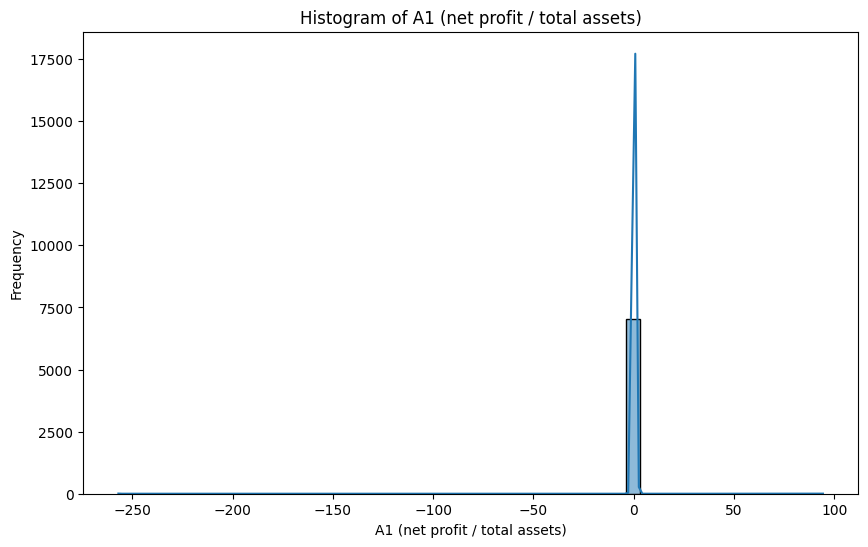

In [30]:
# Histogram of the feature A1
data = X["A1"]
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True)
plt.title("Histogram of A1 (net profit / total assets)")
plt.xlabel("A1 (net profit / total assets)")
plt.ylabel("Frequency")

plt.show()

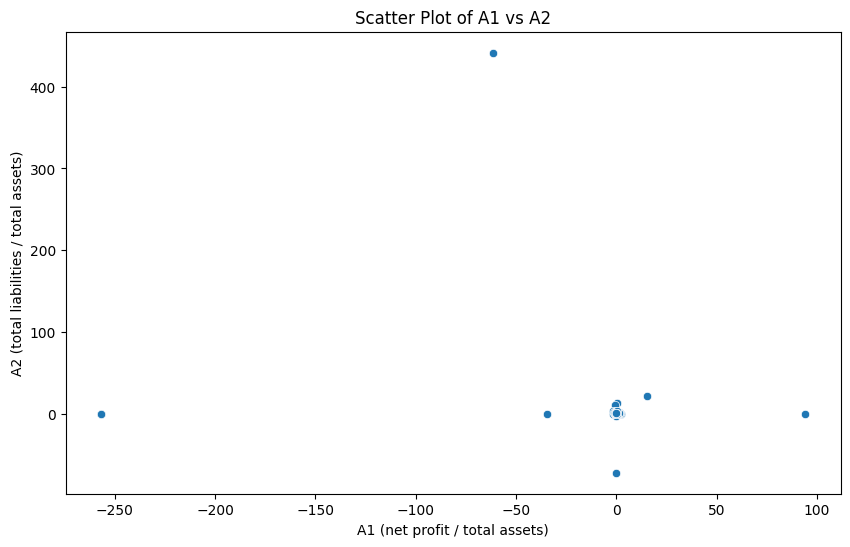

In [15]:
# Assuming X is your DataFrame containing the features
# Ensure 'A1' and 'A2' are in your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x="A1", y="A2", data=X)

plt.title("Scatter Plot of A1 vs A2")
plt.xlabel("A1 (net profit / total assets)")
plt.ylabel("A2 (total liabilities / total assets)")

plt.show()

## Data Preprocessing